In [11]:
import numpy as np
from math import log2
import matplotlib.pyplot as plt
# import time

# class Node:
#     def __init__(self, emitter=None, split=None, roomlabel=None):
#         self.right = None
#         self.left = None
#         self.emitter = emitter
#         self.split = split
#         self.roomlabel = roomlabel



# define nodeType Leaf node, distinguish node, definition of arrow type

treeNode=dict(boxstyle="round4",fc="0.8")
treeleaf=dict(boxstyle="round4",fc="0.8")
arrows=dict(arrowstyle="<-")

# Define node function

def plotNode(nodeText,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeText,xy=parentPt,xycoords='axes fraction',xytext=centerPt, va='center',ha='center',bbox=nodeType,arrowprops=arrows)
    # This parameter is a bit scary. did not understand



In [12]:
def entropy(roomData):
    H=0.0
    i=0
    scoreboard = {1:0, 2:0, 3:0, 4:0}
    size = len(roomData)
    while i<size:
        if roomData[i][-1] == 1:
            scoreboard[1]+=1
        elif roomData[i][-1] == 2:
            scoreboard[2]+=1
        elif roomData[i][-1] == 3:
            scoreboard[3]+=1
        elif roomData[i][-1] == 4:
            scoreboard[4]+=1
        i+=1;
    for i in (1,2,3,4):
        if scoreboard[i] > 0:
            H += ((-scoreboard[i])/size)*(log2(scoreboard[i]/size))
    return H

In [13]:
def InfoGain(All, Left, Right):
    H_SAll=entropy(All)
    Total=len(Left)+len(Right)
    Remainder=((len(Left)/Total)*entropy(Left))+((len(Right)/Total)*entropy(Right))
    Gains=H_SAll-Remainder
    return Gains

In [14]:
def FIND_SPLIT(d):
    emitter = 0
    value = 0
    max_info_gain = 0
    
    for x in range(len(d[0])-2):
        #d.sort(d,key = lambda y: y[x])
        ds = np.array(sorted(d, key = lambda y: y[x], reverse=True))
        for r in range(len(ds)):
            
            split_point = ds[r][x]
            if(r!=len(ds)-1 and ds[r+1][x] == split_point):
                continue
            info_gain = InfoGain(ds, ds[:r+1],ds[r+1:])
            
            if(info_gain > max_info_gain):
                emitter = x
                value = split_point
                max_info_gain = info_gain
            
            
        
    return emitter, value

In [15]:
def split(clean_rows):
    Left = []
    Right = []
    em, val = FIND_SPLIT(clean_rows) #splitvalue[0] = emitter and splitvalue[1] = value under that column
    
    for i in range(len(clean_rows)):
        if(clean_rows[i][em] >= val):
            Left.append(clean_rows[i])
        
        else:
            Right.append(clean_rows[i])
        
    
    
    return np.array(Left),np.array(Right),em,val

In [16]:
def tree_learning(training_data, depth):
    if(entropy(training_data) == 0):
        label = training_data[0][-1]
        leaf = {'emitter':None, 'value':None, 'room': label, 'right':None, 'left':None}
        return leaf, depth
    else:
        ldata, rdata, em, val = split(training_data)
        root = {'emitter': em, 'value': val, 'room': None, 'right':None, 'left':None}
        root['left'], l_depth = tree_learning(ldata, depth+1)
        root['right'], r_depth = tree_learning(rdata, depth+1)
        return root, max(l_depth, r_depth)

In [17]:
# number of leafs function
def countLeaf(tree):
    if(tree is None):
        return 0
    if(tree['left'] == None and tree['right'] == None):
        return 1
    else:
        return countLeaf(tree['left']) + countLeaf(tree['right'])

# depths function
def maxheight(tree):
    if(tree is None):
        return 0
    else:
        leftheight = maxheight(tree['left'])
        rightheight = maxheight(tree['right'])
        
        if(leftheight > rightheight):
            return leftheight +1
        else:
            return rightheight +1
        
        

In [18]:
# Plots text between child and parent
def plotMidText(cntrPt,parentPt,txtString):
    xMid=(parentPt[0]-cntrPt[0])/1.5+cntrPt[0]
    yMid=(parentPt[1]-cntrPt[1])/1.5+cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString) #idk where this comes from

# define the main functions, plotTree
def plotTree(myTree, parentPt, nodeTxt, direction):#if the first key tells you what feat was split on
    if (myTree is None):
        return
    leaf_num = countLeaf(myTree)  #this determines the x width of this tree
    height = maxheight(myTree)
    cntrPt = (plotTree.xOff + (1.0 + float(leaf_num))/2.0/plotTree.totalW, plotTree.yOff)
    plotTree.yOff = (plotTree.yOff - 1.0/plotTree.totalD)
    if (myTree['right'] != None and myTree['left'] != None):
        textInNode=str('X <' + str(myTree['value'])+'\n'+ str(myTree['emitter']))
        plotNode(textInNode, cntrPt, parentPt, treeNode)
        plotTree(myTree['left'], cntrPt, myTree['emitter'], 'l')
        plotTree(myTree['right'], cntrPt, myTree['emitter'], 'r')        #recursion
    else:   #it's a leaf node print the leaf node
        textInNode=str(myTree['room'])
        plotTree.xOff = (plotTree.xOff + 1.0/plotTree.totalW)
        plotNode(textInNode, cntrPt, parentPt, treeleaf) 
    plotTree.yOff = (plotTree.yOff + 1.0/plotTree.totalD)
#if you do get a dictonary you know it's a tree, and the first element will be another dict



In [19]:
# Perform graphic display
def createPlot(inTree):
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    axprops=dict(xticks=[],yticks=[])
    createPlot.ax1=plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW=float(0.3*countLeaf(inTree))
    plotTree.totalD=float(0.3*maxheight(inTree))
    plotTree.xOff=-0.5/plotTree.totalW
    plotTree.yOff=1.0
    plotTree(inTree,(0.5,1.0),'',None)
    plt.show()

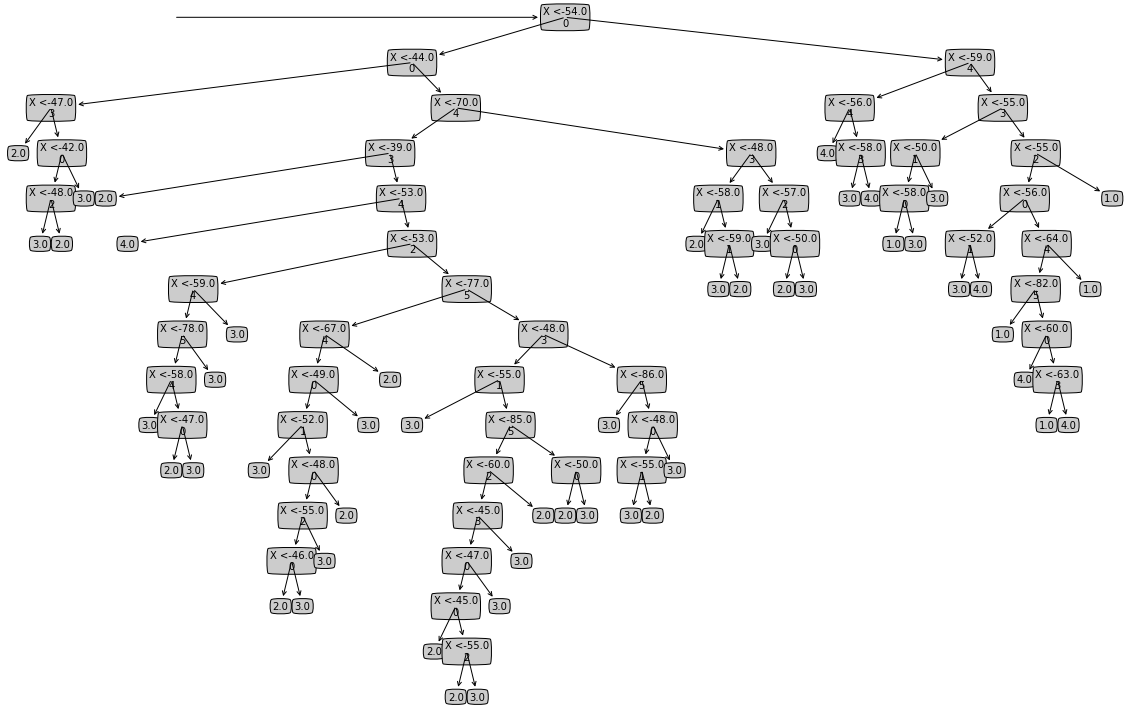

In [20]:
clean_rows = np.loadtxt("clean_dataset.txt")
t, d = tree_learning(clean_rows, 0)

createPlot(t)#.savefig("treefig.png")